# Libraries

In [30]:
import tensorflow
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

# Preprocessing

In [31]:
list_paths = []
for folder in os.listdir('pet_facial_exp/'):
    list_paths.extend([folder+'/'+i for i in os.listdir('pet_facial_exp/'+folder)])
# df = pd.DataFrame()

In [32]:
df = pd.DataFrame({'path': list_paths})

In [33]:
df['exp'] = df['path'].apply(lambda x: x.split('/')[0])

In [138]:

# create new image of desired size and color (blue) for padding
def add_padding_new(img, new_x, new_y):
    old_image_height, old_image_width, channels = img.shape
    color = (255,255,255)
    result = np.full((new_x,new_y, 3), color, dtype=np.uint8)

    # compute center offset
    x_center = (new_x - old_image_width) // 2
    y_center = (new_y - old_image_height) // 2
    result[y_center:y_center+old_image_height, x_center:x_center+old_image_width] = img
    return result

In [ ]:
base_image_path = 'pet_facial_exp/'
images = []
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

for path in df['path']:
    img = plt.imread(base_image_path + path)
    # img = cv2.resize(img, dsize=(179, 179), interpolation=cv2.INTER_CUBIC)
    # img = rgb2gray(img)
    # img = img.reshape((179,179,1))
    img = add_padding_new(img, 224, 224)
    img = img /255
    img = add_padding_new(img, 224, 224)

    images.append(np.asarray(img).astype('float32'))
    
    # break
# df['image'] = images

In [ ]:
img.shape

In [ ]:
X = images
X = np.array(X)
y = df['exp']
y = pd.get_dummies(y)
for col in y.columns:
    y[col] = y[col].astype(float)
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
y.shape

(1000, 4)

In [84]:
X.shape

(1000, 179, 179, 3)

# Model


In [121]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 2), activation='relu', input_shape=(179, 179, 3)))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 4), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
# model.add(layers.Dense(900))
model.add(layers.Dense(4, kernel_regularizer='l2', activation='softmax'))

In [122]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 176, 178, 32)      800       
                                                                 
 average_pooling2d_6 (Averag  (None, 88, 89, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_80 (Conv2D)          (None, 87, 86, 64)        16448     
                                                                 
 conv2d_81 (Conv2D)          (None, 85, 84, 64)        36928     
                                                                 
 dropout_4 (Dropout)         (None, 85, 84, 64)        0         
                                                                 
 flatten_23 (Flatten)        (None, 456960)            0         
                                                     

In [123]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_test, y_test), verbose = 1)

Epoch 1/100
25/25 [==============================] - 23s 900ms/step - loss: 2.2933 - accuracy: 0.2350 - val_loss: 1.6088 - val_accuracy: 0.2950
Epoch 2/100
25/25 [==============================] - 25s 1s/step - loss: 1.5920 - accuracy: 0.3075 - val_loss: 1.5549 - val_accuracy: 0.3250
Epoch 3/100
25/25 [==============================] - 32s 1s/step - loss: 1.4953 - accuracy: 0.4162 - val_loss: 1.5562 - val_accuracy: 0.3350
Epoch 4/100
25/25 [==============================] - 26s 1s/step - loss: 1.3770 - accuracy: 0.4800 - val_loss: 1.6066 - val_accuracy: 0.2900
Epoch 5/100
25/25 [==============================] - 26s 1s/step - loss: 1.1461 - accuracy: 0.6587 - val_loss: 1.7197 - val_accuracy: 0.2800
Epoch 6/100
21/25 [========================>.....] - ETA: 3s - loss: 0.9134 - accuracy: 0.7351

KeyboardInterrupt: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


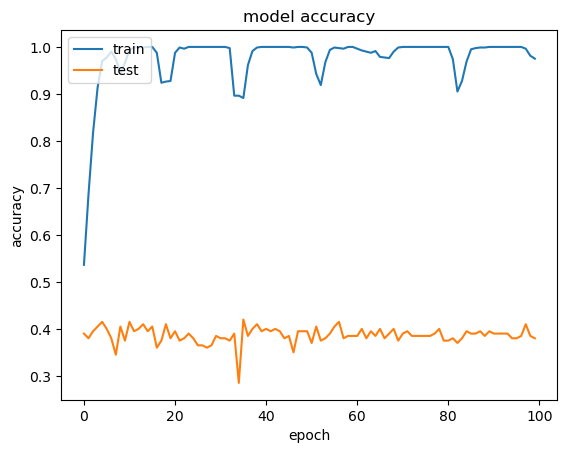

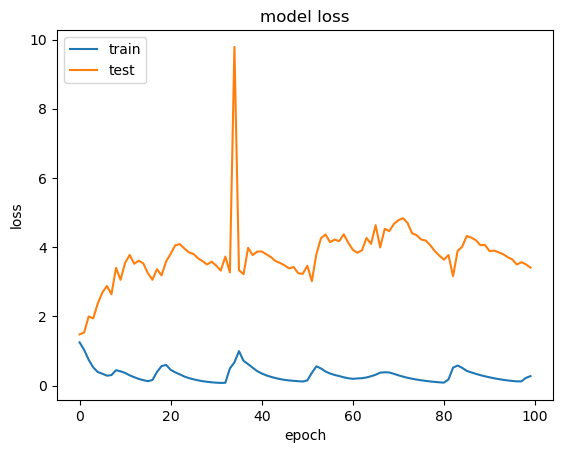

In [119]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()